In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [2]:
df = pd.read_csv('../results/outputs/scaled_data.csv')

In [3]:
#identify col
cat_cols = df.select_dtypes(include='object').columns
print("Categorical columns to encode:", list(cat_cols))

Categorical columns to encode: ['wd', 'station']


In [4]:
#missing value handel in categorical
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

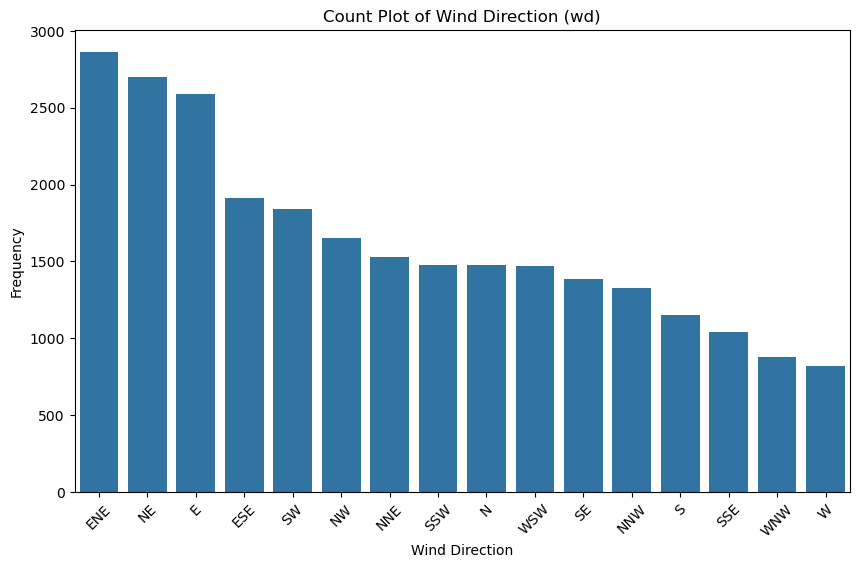

In [5]:
#EDA
if 'wd' in df.columns:
    plt.figure(figsize=(10,6))
    sns.countplot(data=df, x='wd', order=df['wd'].value_counts().index)
    plt.title("Count Plot of Wind Direction (wd)")
    plt.xlabel("Wind Direction")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    os.makedirs('../results/eda_visualizations', exist_ok=True)
    plt.savefig('../results/eda_visualizations/wd_countplot.png')
    plt.show()

In [6]:
#Encoded cols
df_encoded = pd.get_dummies(df, columns=cat_cols, prefix=cat_cols)
print("Encoded dataset shape:", df_encoded.shape)
print(df_encoded.head())

Encoded dataset shape: (26125, 34)
         No      year     month      day      hour     PM2.5      PM10  \
0 -1.784517 -1.444888 -1.078101 -1.69262 -1.458894 -1.111903 -1.302669   
1 -1.784219 -1.444888 -1.078101 -1.69262 -1.029833 -1.130260 -1.318561   
2 -1.784120 -1.444888 -1.078101 -1.69262 -0.886813 -1.111903 -1.302669   
3 -1.784021 -1.444888 -1.078101 -1.69262 -0.743793 -1.093545 -1.286778   
4 -1.783921 -1.444888 -1.078101 -1.69262 -0.600772 -1.130260 -1.270886   

        SO2       NO2        CO  ...  wd_NW   wd_S  wd_SE  wd_SSE  wd_SSW  \
0 -0.809157 -1.268637 -1.181517  ...   True  False  False   False   False   
1 -0.480706 -0.093117 -1.345934  ...  False  False  False   False   False   
2 -0.316480 -0.927357 -1.181517  ...   True  False  False   False   False   
3 -0.234367 -0.775677 -1.017100  ...   True  False  False   False   False   
4 -0.070141 -0.358557 -1.017100  ...  False  False  False   False   False   

   wd_SW   wd_W  wd_WNW  wd_WSW  station_Dongsi  
0  Fals

In [7]:
os.makedirs('../results/outputs', exist_ok=True)
df_encoded.to_csv('../results/outputs/encoded_data.csv', index=False)
print("Encoded dataset saved to: ../results/outputs/encoded_data.csv")

Encoded dataset saved to: ../results/outputs/encoded_data.csv
